In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("ihdp.csv")

In [3]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


In [4]:
df.isnull().x25.sum()

0

In [5]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 't', 'yf', 'ycf', 'ite'],
      dtype='object')

In [6]:
df.isnull().any()

x1     False
x2     False
x3     False
x4     False
x5     False
x6     False
x7     False
x8     False
x9     False
x10    False
x11    False
x12    False
x13    False
x14    False
x15    False
x16    False
x17    False
x18    False
x19    False
x20    False
x21    False
x22    False
x23    False
x24    False
x25    False
t      False
yf     False
ycf    False
ite    False
dtype: bool

In [7]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.448082e-17,4.755975e-18,-2.377988e-17,-5.612051e-16,4.280378e-17,-7.633341e-16,0.514056,0.093708,0.520750,0.364123,...,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,...,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [10]:
df.shape

(747, 29)

<AxesSubplot:ylabel='Frequency'>

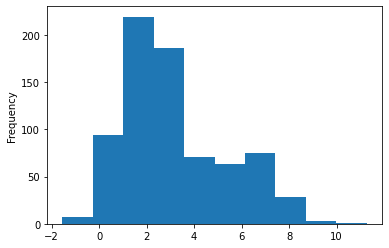

In [11]:
df.yf.plot(kind='hist')

In [12]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [13]:
train_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
460,-0.267048,0.196818,0.383828,-0.879606,-0.066534,1.460832,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.085724,4.968646,3.438869
110,-1.131693,-0.602710,1.128554,0.161703,0.433603,0.135907,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.542803,7.757289,4.335205
736,-1.283006,-1.002474,-0.360898,2.244320,-2.067085,-0.195324,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.364811,4.894854,3.958254
541,-0.029270,-0.202946,0.011465,0.161703,-0.754224,-0.360940,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.894418,1.520922,4.506946
524,-1.088461,-1.402238,1.128554,0.161703,0.808706,-0.526556,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.145284,6.038642,4.482852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.397395,1.396110,-1.477987,0.161703,0.058500,0.963985,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.020229,5.571941,3.658195
152,-0.893916,-0.602710,-0.360898,-0.879606,0.996258,0.135907,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.639636,6.450962,3.923367
512,0.727295,0.196818,-1.105624,1.203011,1.371361,-0.360940,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.574748,6.725545,3.713057
675,0.813759,-0.373869,-0.733261,0.161703,0.058500,-1.189018,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.906938,5.813399,4.582950


In [14]:
test_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
149,0.186891,0.596582,0.756191,-0.879606,-1.129327,-0.857787,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.184495,6.129615,4.644387
722,-0.037916,0.596582,0.383828,0.161703,-3.567498,-0.029709,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.309168,2.106966,4.400717
33,-1.218158,-1.002474,1.128554,-0.879606,-0.129052,0.798369,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.432861,7.772115,3.349955
345,-0.396744,-0.602710,0.011465,-0.879606,0.308569,-1.354634,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.068977,4.124603,4.662679
98,1.051537,1.396110,-0.733261,1.203011,-1.191844,-0.360940,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.783099,4.376373,4.329483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.748911,0.596582,-0.360898,-0.879606,-1.191844,1.129600,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.027350,8.408984,2.972203
65,0.813759,0.996346,-0.360898,0.161703,-0.379120,-0.360940,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.744767,6.931439,4.429728
403,0.640830,0.596582,-1.105624,0.161703,0.308569,1.460832,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.509245,7.394297,1.663206
179,0.186891,0.596582,0.383828,-0.879606,0.621155,-0.526556,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.550118,5.052416,4.551081


In [15]:
test_data["yf"]

149    2.184495
722    5.309168
33     3.432861
345    3.068977
98     2.783099
         ...   
729    5.027350
65     1.744767
403    3.509245
179    3.550118
519    6.691096
Name: yf, Length: 150, dtype: float64

In [19]:
test_data["yf"].value_counts()

2.184495    1
1.737342    1
1.052633    1
3.252402    1
0.627056    1
           ..
2.519958    1
1.877367    1
1.718035    1
0.543326    1
6.691096    1
Name: yf, Length: 150, dtype: int64